# Uber Trips Analysis

By analyzing Uber Trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset contains information about Uber Trips from New York, a city  with a very complex transportation system with a large residential community

The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015.

Original project Aman Kharwal

We will start by importing the necessarry Python libraies and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


This dataset contains data about data and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup. 

In [2]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


So we have prepared this data according to the days and hours, as we using the Uber trips for the September month so let's have a look at each day to see on which day the Uber trips were highest

C:\Users\T14\AppData\Local\Temp\ipykernel_11560\2895163956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

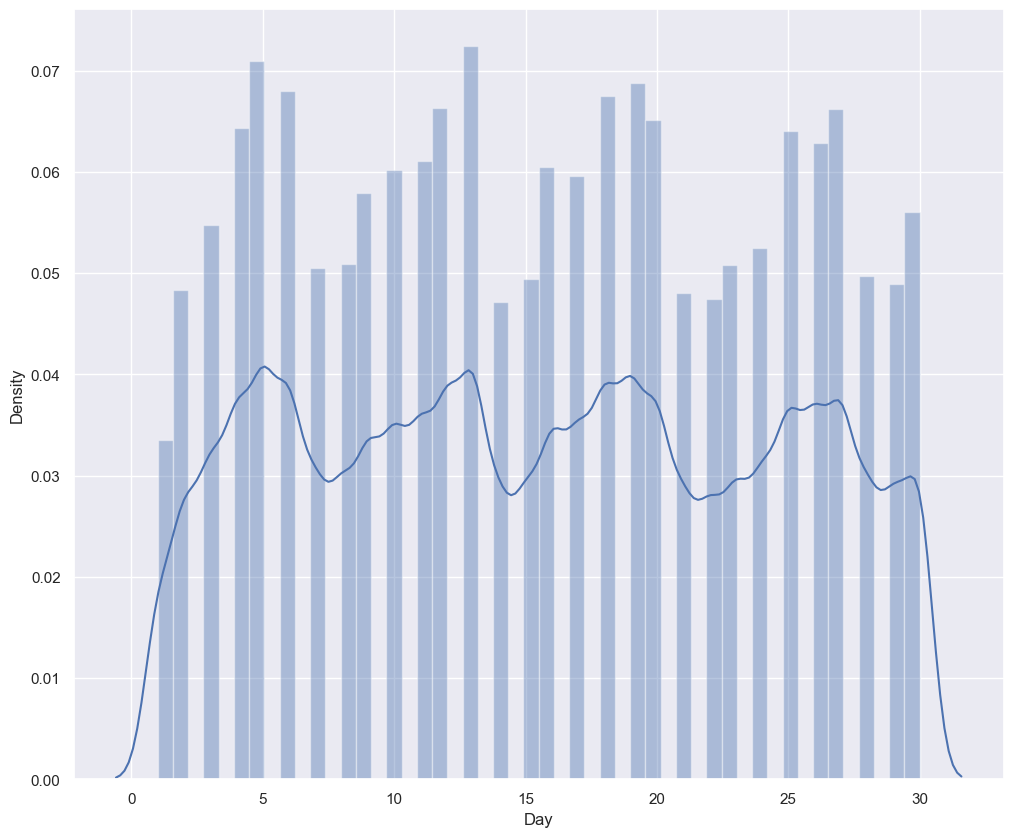

In [3]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])


By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let's analyze the Uber trips according to the hours:

C:\Users\T14\AppData\Local\Temp\ipykernel_11560\96630979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

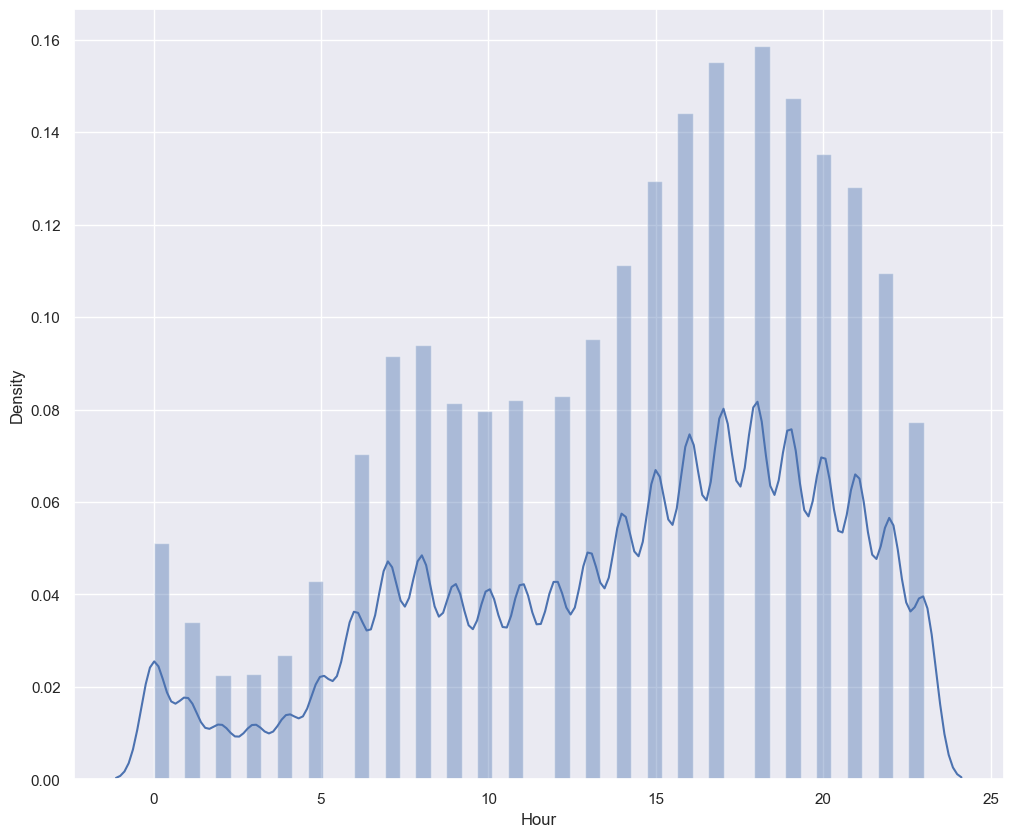

In [4]:
sns.distplot(data["Hour"])

According to the hourly data, the Ube trips decreases afeter midnight and the start increasing after 5am  and the trips keep rising till 6pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let's analyze the Uber trips according to the weekdays

C:\Users\T14\AppData\Local\Temp\ipykernel_11560\2902878023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekday"])


<Axes: xlabel='weekday', ylabel='Density'>

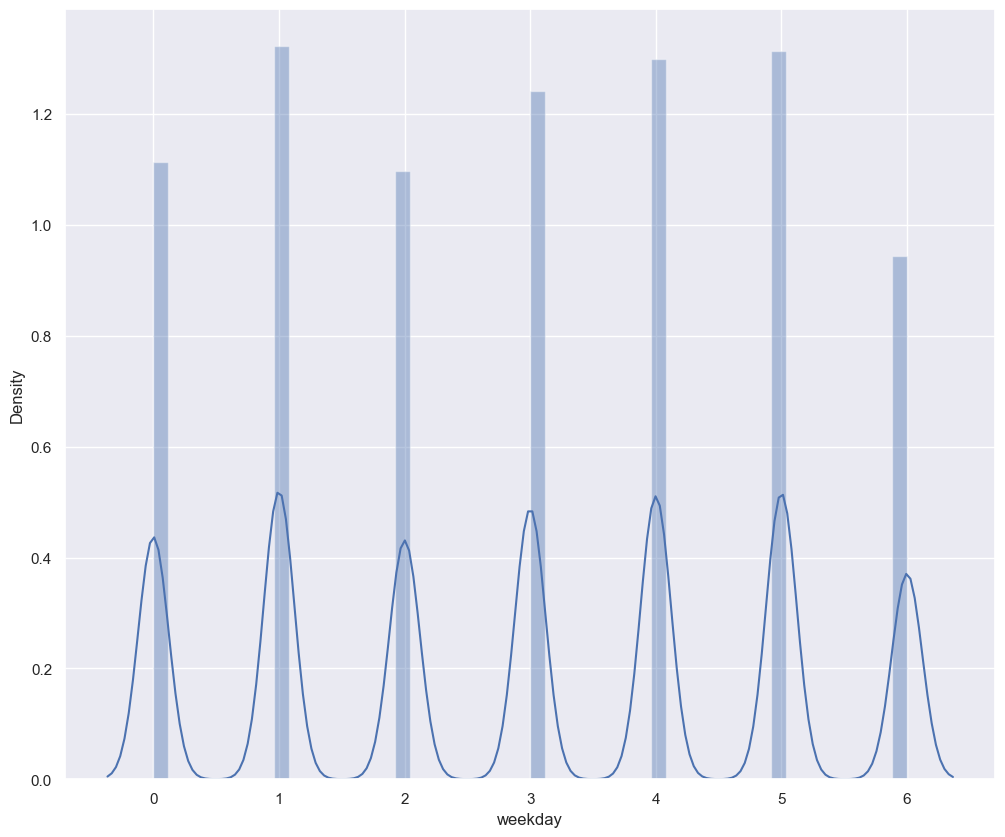

In [6]:
sns.distplot(data["weekday"])

In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are lowest and on Mondays, they are the highest. Now let's have a look at the correlation of hours and weekdays on the Uber trips:

<Axes: xlabel='Hour', ylabel='weekday'>

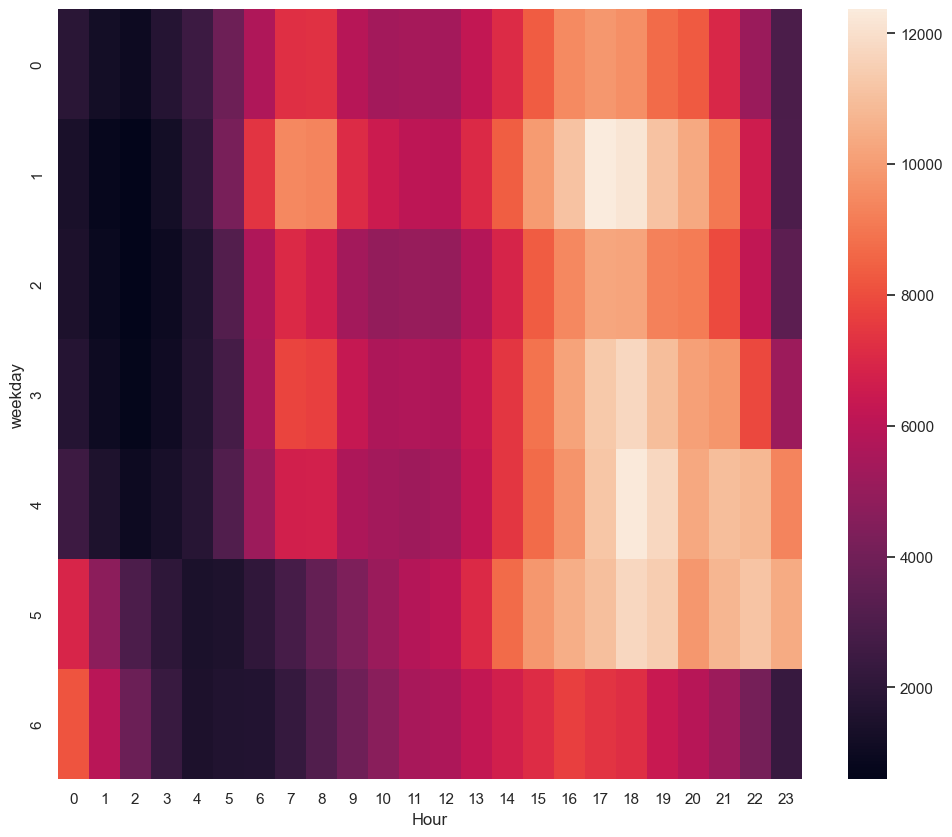

In [8]:
# Correlation of Weekday and Hour

df = data.groupby(["weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New York city

c:\Users\T14\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


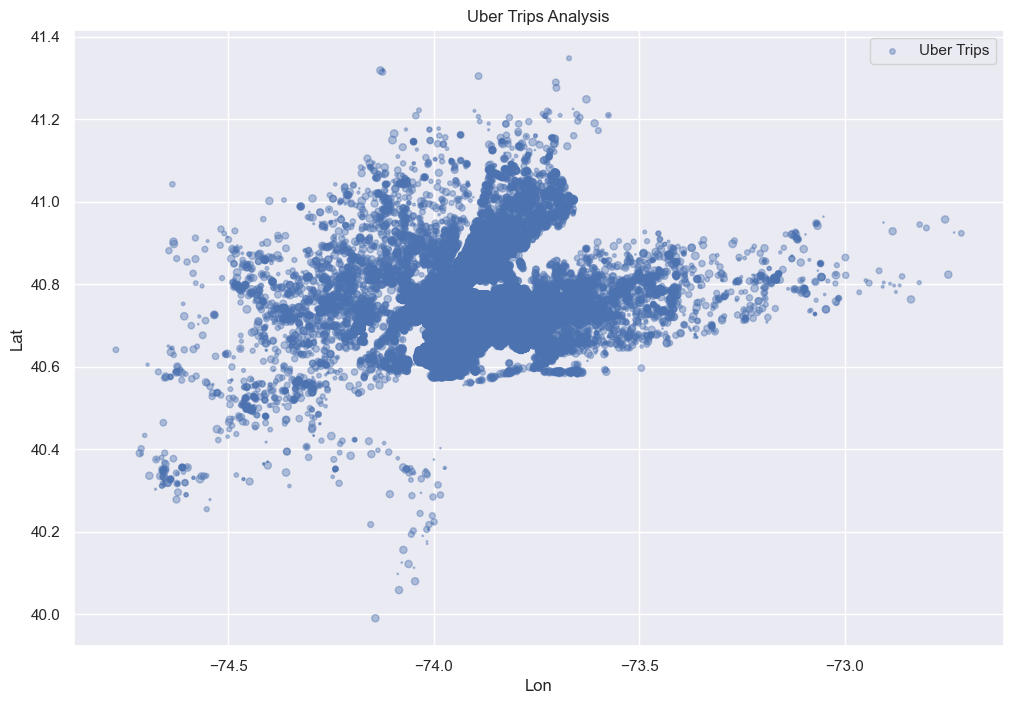

In [9]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
          figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()